# Module 12 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [286]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [287]:
# Allow splinter to open the "Chrome" browser
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [288]:
# Visit the website

url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [289]:
# Create a Beautiful Soup Object
html = browser.html
soup = soup(html, 'html.parser')

In [290]:
# Extract all rows of data
weather_data = soup.find_all('table')
weather_df = pd.read_html(str(weather_data))[0]
weather_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [259]:
# Extract the HTML data from the selected website
table = soup.find('table', class_='table')
table

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [260]:
# Create an empty list
mars_weather = []
# Loop through the scraped data to create a list of rows
mars_weather_table = table.find_all('th')

for header_element in mars_weather_table:
    title = header_element.text
    mars_weather.append(title)
mars_weather

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [261]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
weather_df = pd.DataFrame(columns = mars_weather)
# Rename columns for ease of readability and improved display.
weather_df = weather_df.rename(columns = {'id':'ID', 'terrestrial_date': 'Terrestrial Date', 'sol': 'SOL', 'ls': 'LS', 'month': 'Month', 'min_temp': 'Min Temp', 'pressure': 'Pressure'})
# Create a Pandas DataFrame by using the list of rows and a list of the column names
for row in table.find_all('tr',class_='data-row'):
        data = row.find_all('td')
        row_data=[td.text.strip() for td in data]
        lenghth=len(weather_df)
        weather_df.loc[lenghth]=row_data

In [262]:
# Confirm DataFrame was created successfully
weather_df.head()

,ID,Terrestrial Date,SOL,LS,Month,Min Temp,Pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [263]:
# Examine data type of each column (in a dataframe for ease of readability)
pd.DataFrame(weather_df.dtypes)

,0
ID,object
Terrestrial Date,object
SOL,object
LS,object
Month,object
Min Temp,object
Pressure,object


In [264]:
# Change data types for data analysis and data sorting
weather_df['ID'] = weather_df['ID'].astype(int)
weather_df['Terrestrial Date'] = weather_df['Terrestrial Date'].apply(pd.to_datetime)
weather_df['SOL'] = weather_df['SOL'].astype(int)
weather_df['LS'] = weather_df['LS'].astype(int)
weather_df['Month'] = weather_df['Month'].astype(int)
weather_df['Min Temp'] = weather_df['Min Temp'].astype(float)
weather_df['Pressure'] = weather_df['Pressure'].astype(float)

In [265]:
# Confirm type changes were successful by examining data types again
pd.DataFrame(weather_df.dtypes)

,0
ID,int32
Terrestrial Date,datetime64[ns]
SOL,int32
LS,int32
Month,int32
Min Temp,float64
Pressure,float64


### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [266]:
# 1. How many months are there on Mars?
months = weather_df['Month'].nunique()
print(f'There are {months} months observed on Mars')

There are 12 months observed on Mars


In [267]:
# 2. How many Martian days' worth of data are there?
    # Subtract 1 to account for header row
martian_days = weather_df['ID'].__len__()-1
print(f'There are {martian_days} Martian days observed on Mars')

There are 1866 Martian days observed on Mars


In [268]:
# 3. What is the average low temperature by month?
temp_df = weather_df.groupby(['Month'])['Min Temp'].mean()
temp_df = temp_df.reset_index()
temp_df

,Month,Min Temp
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725
5,6,-75.299320
6,7,-72.281690
7,8,-68.382979
8,9,-69.171642
9,10,-71.982143


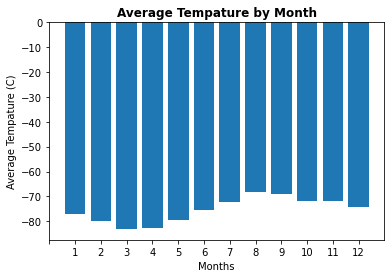

In [269]:
# Plot the average temperature by month
plt.bar(temp_df['Month'], temp_df['Min Temp'])
plt.xlabel('Months')
plt.xticks(range(len([1,2,3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])),[" "]+[1,2,3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
plt.ylabel('Average Tempature (C)')
plt.title('Average Tempature by Month', weight = "bold")
plt.savefig("figures\\Average_Temperature_by_Month.png")


In [270]:
# Identify the coldest and hottest months in Curiosity's location
temp_df = weather_df.groupby(['Month'])['Min Temp'].mean().sort_values()
temp_df = temp_df.reset_index()
temp_df

,Month,Min Temp
0,3,-83.307292
1,4,-82.747423
2,2,-79.932584
3,5,-79.308725
4,1,-77.160920
5,6,-75.299320
6,12,-74.451807
7,7,-72.281690
8,11,-71.985507
9,10,-71.982143


In [271]:
# 4. Average pressure by Martian month
pressure_df = weather_df.groupby(['Month'])['Pressure'].mean()
pressure_df = pressure_df.reset_index()
pressure_df.round(2)

,Month,Pressure
0,1,862.49
1,2,889.46
2,3,877.32
3,4,806.33
4,5,748.56
5,6,745.05
6,7,795.11
7,8,873.83
8,9,913.31
9,10,887.31


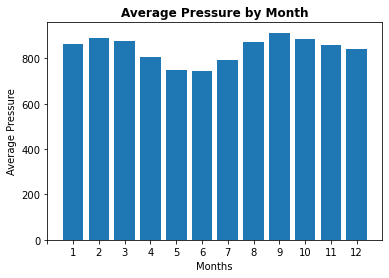

In [272]:
# Plot the average pressure by month
plt.bar(pressure_df['Month'], pressure_df['Pressure'])
plt.xlabel('Months')
plt.xticks(range(len([1,2,3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])),[" "]+[1,2,3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
plt.ylabel('Average Pressure')
plt.title('Average Pressure by Month', weight = "bold")
plt.savefig("figures\\Average_Pressure_by_Month.png")

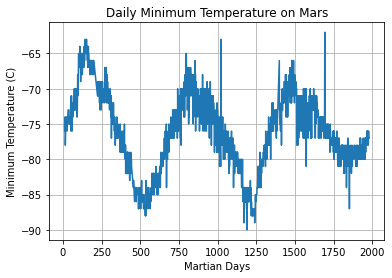

In [273]:
# 5. How many terrestrial (earth) days are there in a Martian year?
plt.plot(weather_df['SOL'], weather_df['Min Temp'])
plt.xlabel("Martian Days")
plt.ylabel("Minimum Temperature (C)")
plt.title("Daily Minimum Temperature on Mars")
plt.grid()

In [283]:
weather_df.groupby(['SOL'])['Min Temp']
temp_df[520:750]

,SOL,Min Temp
520,1296,-79.0
521,1936,-79.0
522,1295,-79.0
523,1934,-79.0
524,1932,-79.0
...,...,...
745,1760,-78.0
746,1047,-77.0
747,1054,-77.0
748,1055,-77.0


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [284]:
# Write the data to a CSV
weather_df.to_csv('weather_df.csv')

In [285]:
browser.quit()